<a href="https://colab.research.google.com/github/Shreyansh1206/Lattice-Physics-ML-Model/blob/main/Lattice_Physics_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("rawdata.csv")

#modifying the dataset because the data was placed in single rows initially
modified_dataset_array = np.zeros(dataset.shape)
modified_dataset = pd.DataFrame(modified_dataset_array)

all_numbers = []
for i in range(dataset.shape[0]):
  numbers_in_row = dataset.iloc[i][0].split()
  all_numbers.extend([float(num) for num in numbers_in_row])

modified_dataset_array = np.array(all_numbers).reshape(dataset.shape[0],41)
modified_dataset = pd.DataFrame(modified_dataset_array)

<ipython-input-20-f6fef74010a3>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numbers_in_row = dataset.iloc[i][0].split()


In [13]:
#checking if the dataset has empty cells anywhere
print(modified_dataset.isnull().sum().sum())
#no null values found

0


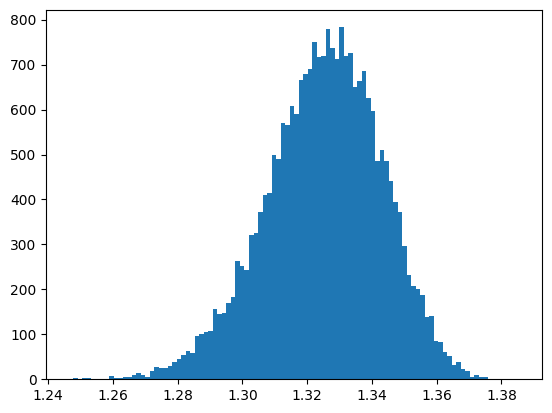

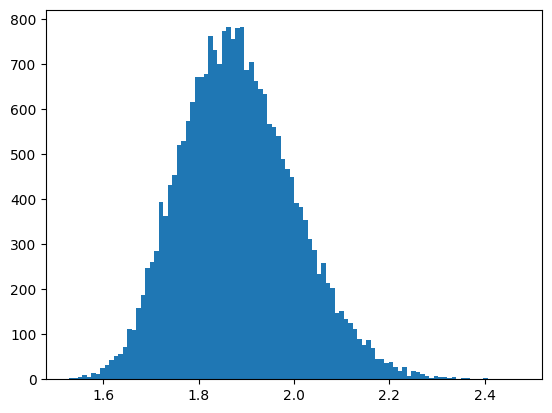

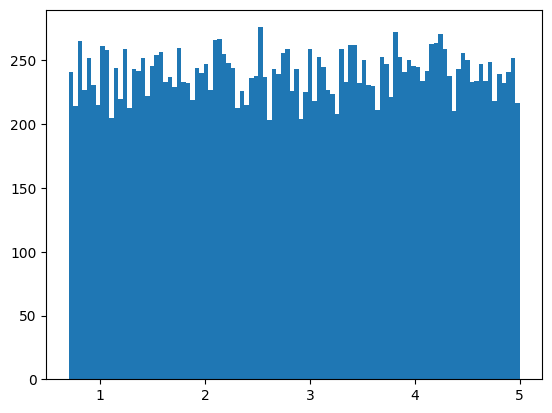

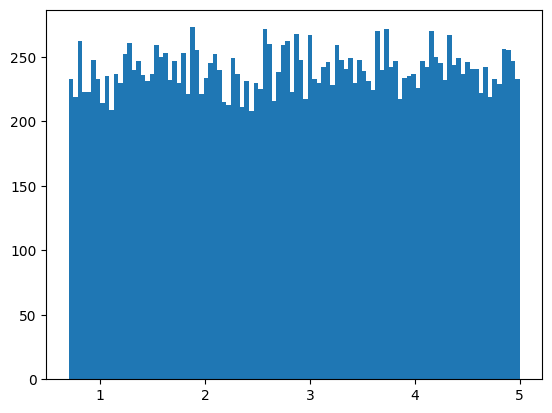

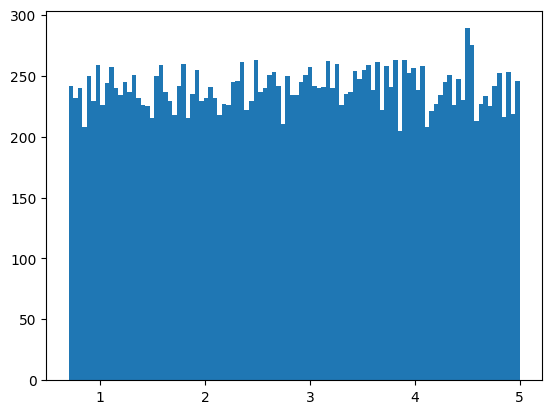

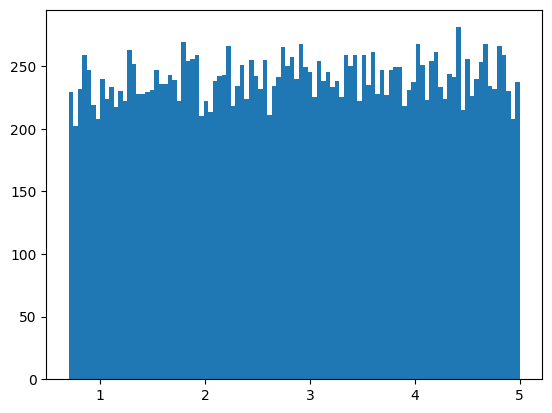

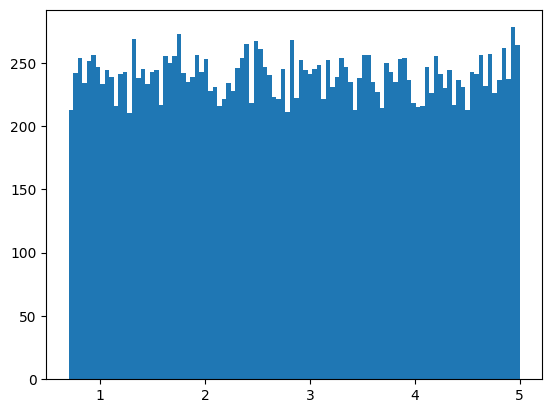

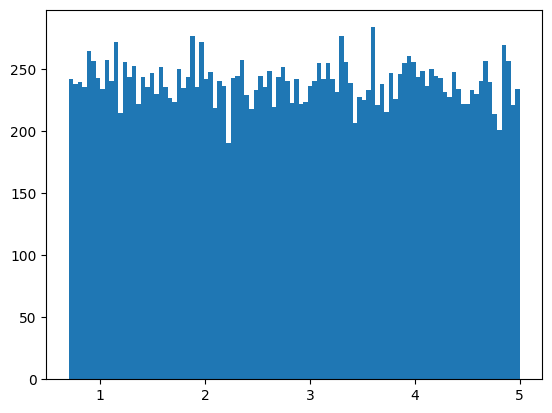

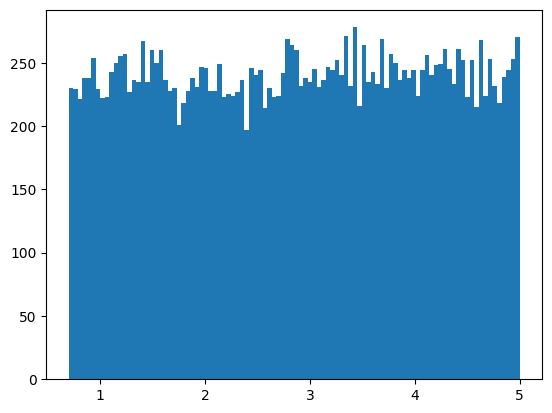

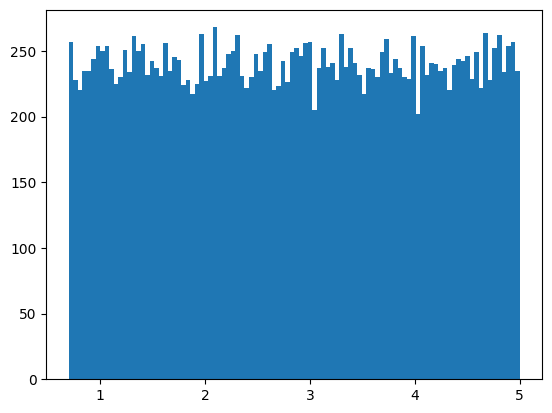

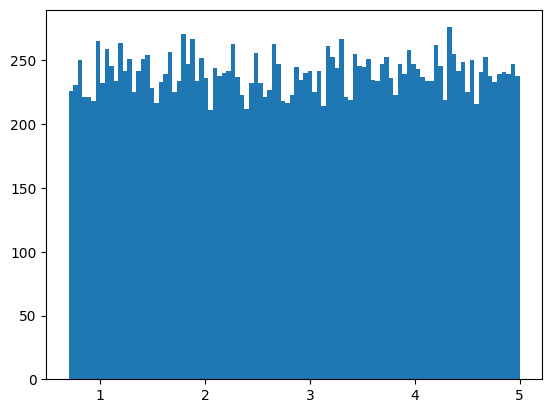

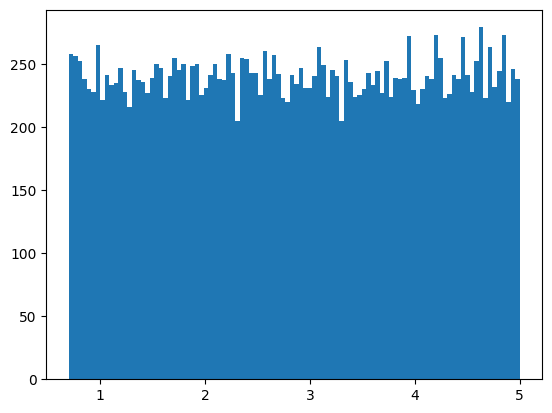

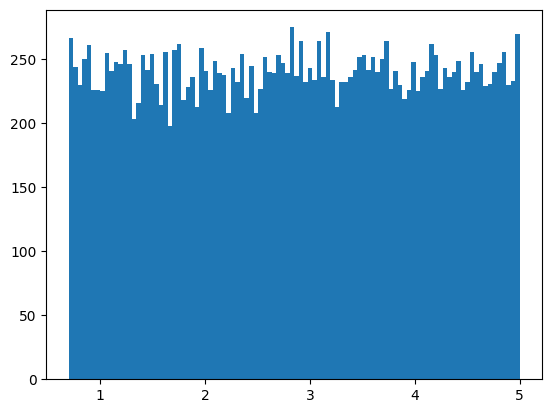

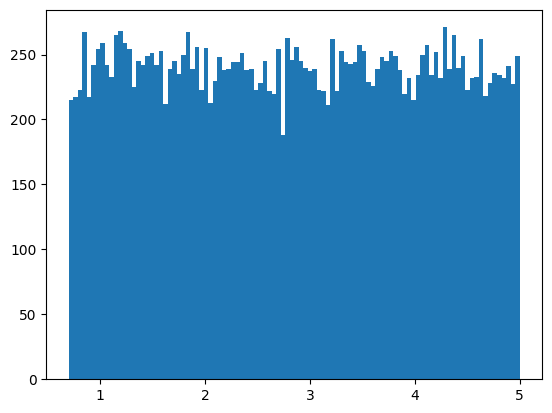

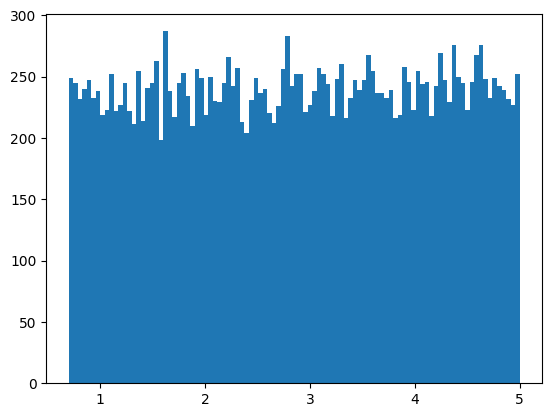

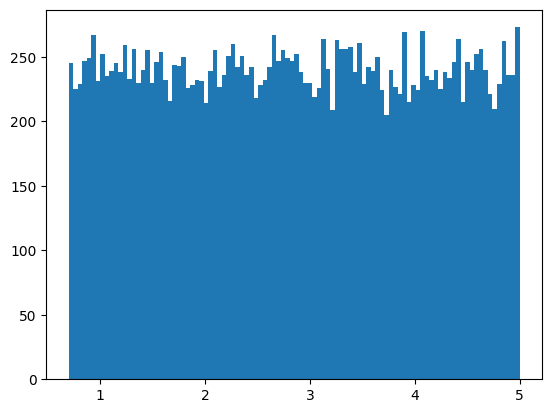

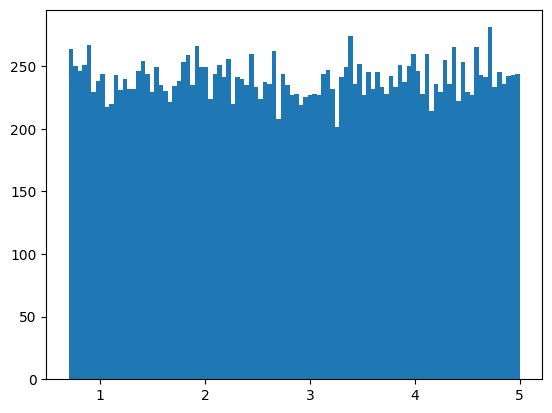

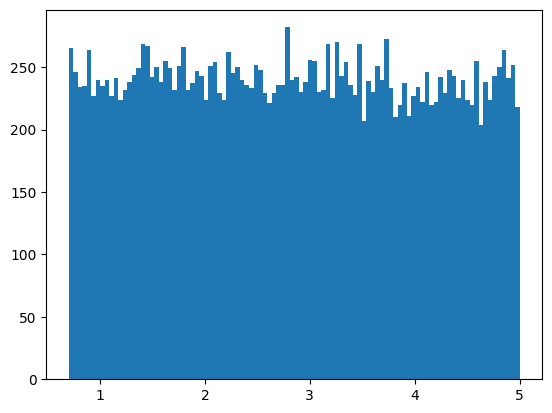

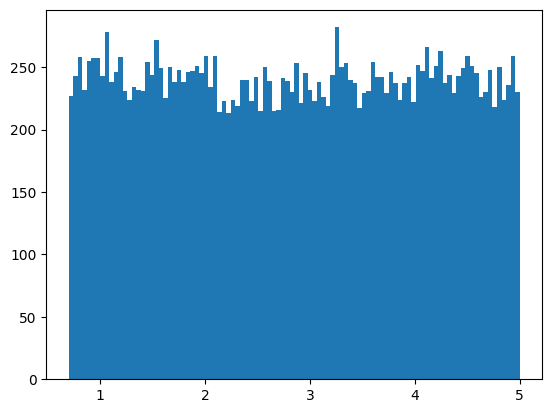

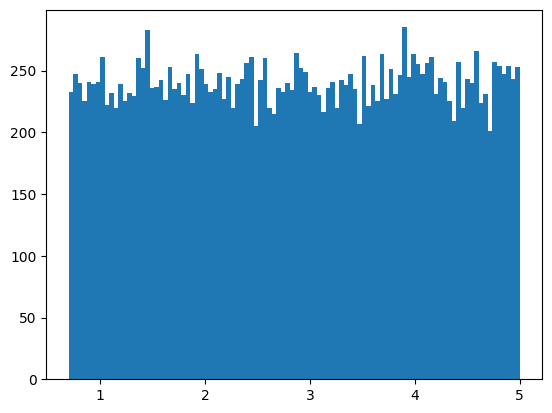

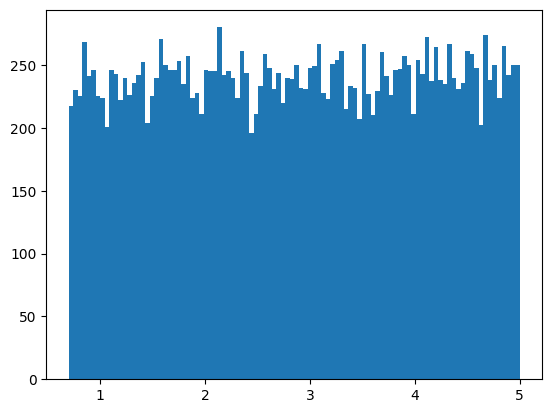

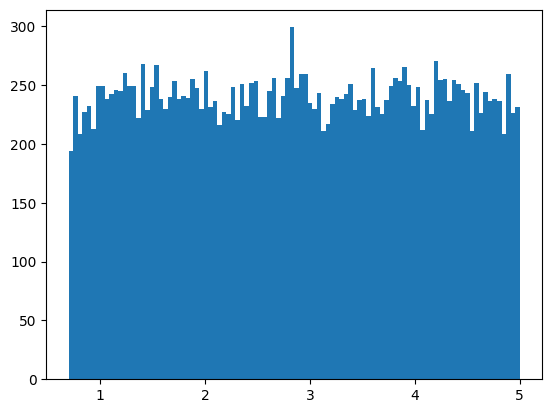

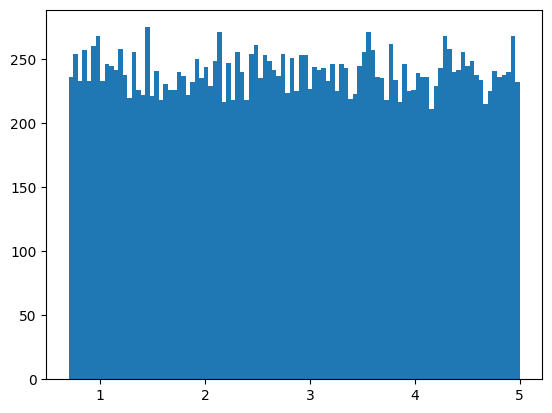

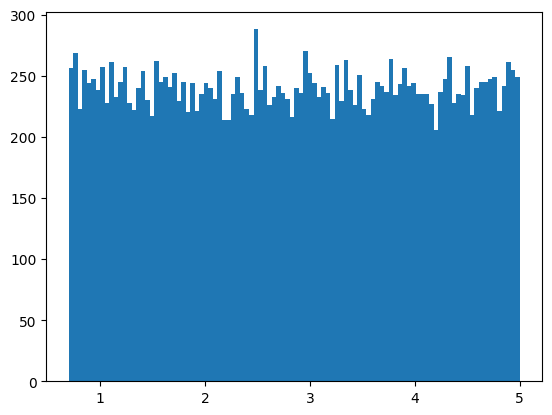

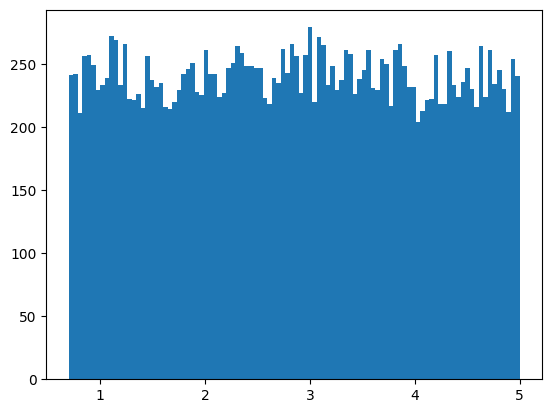

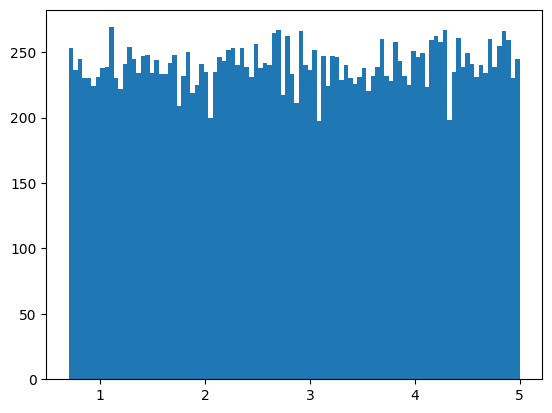

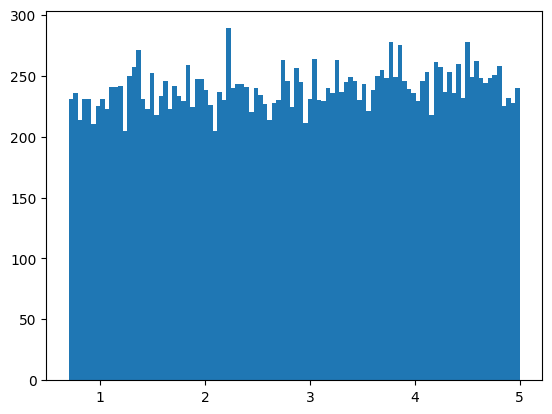

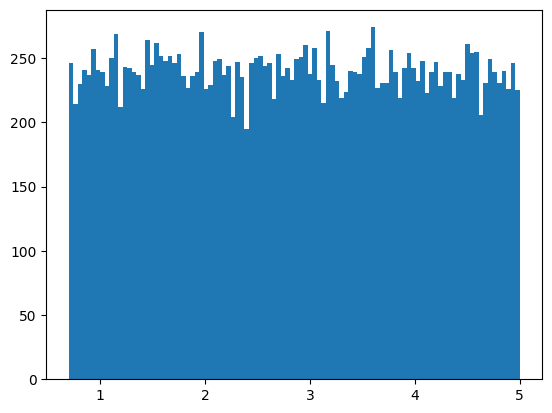

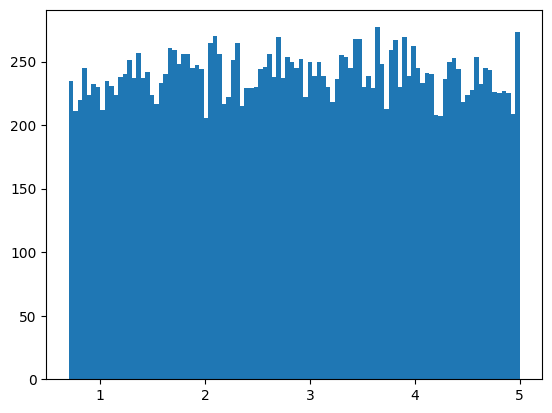

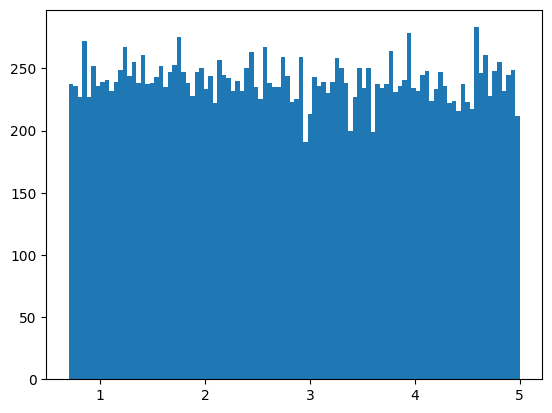

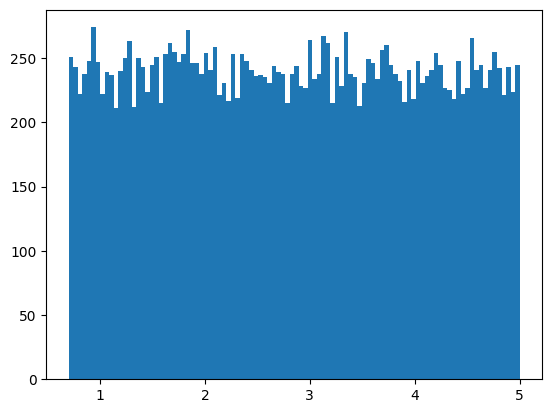

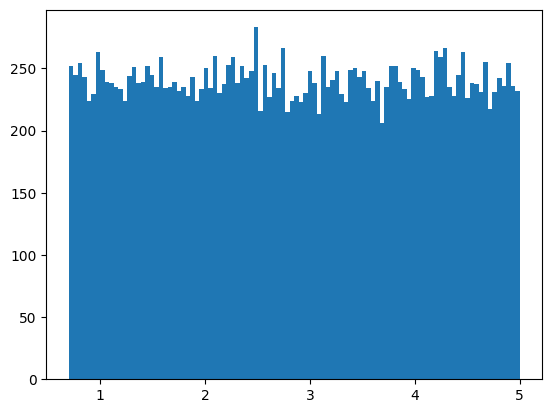

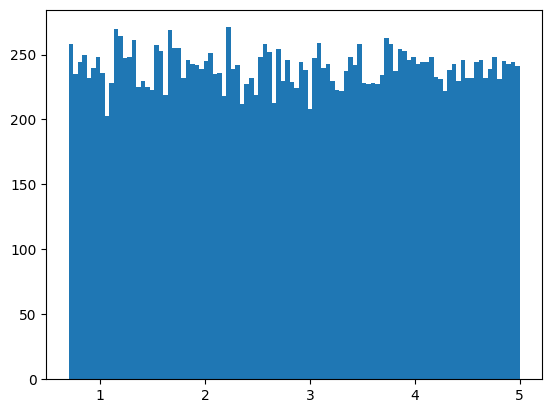

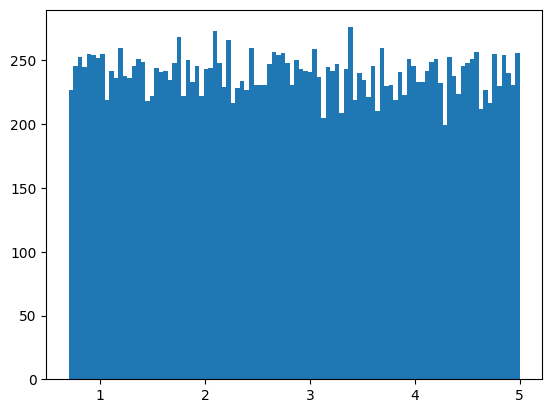

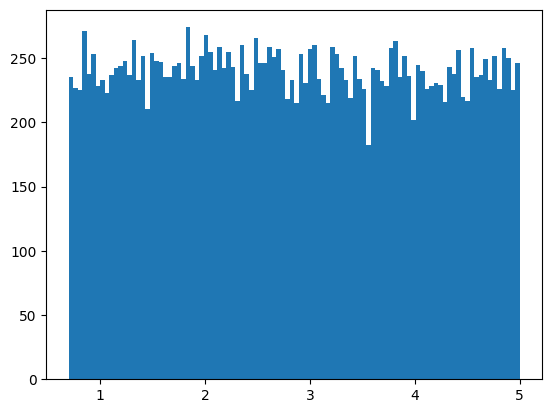

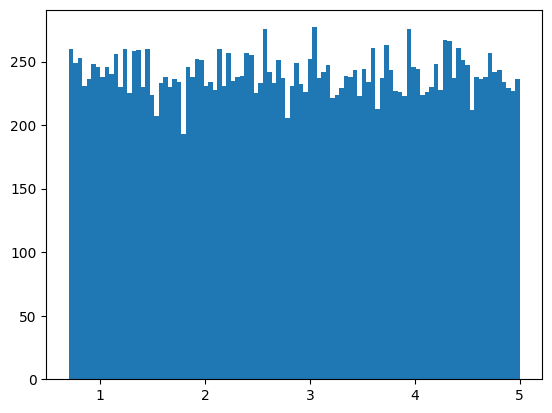

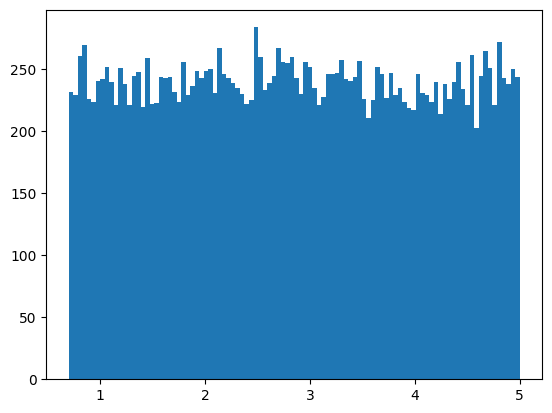

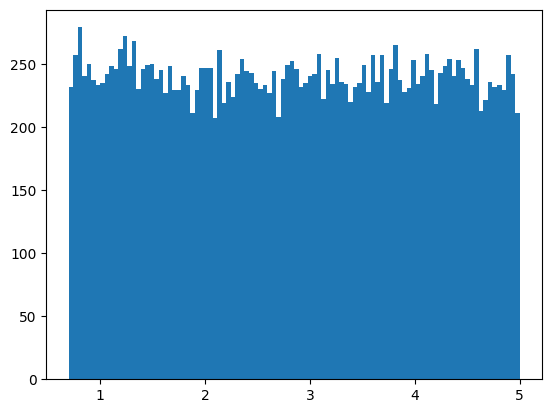

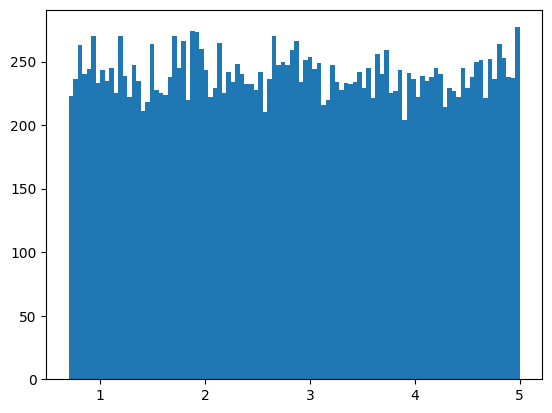

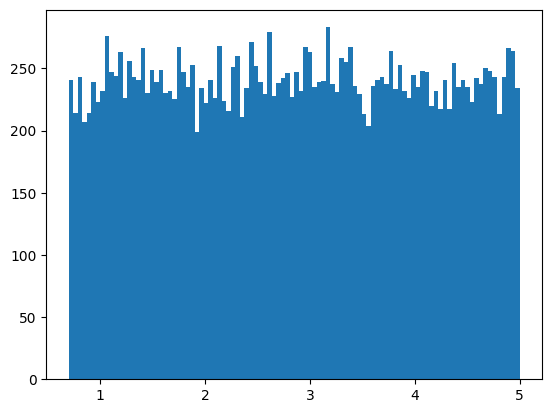

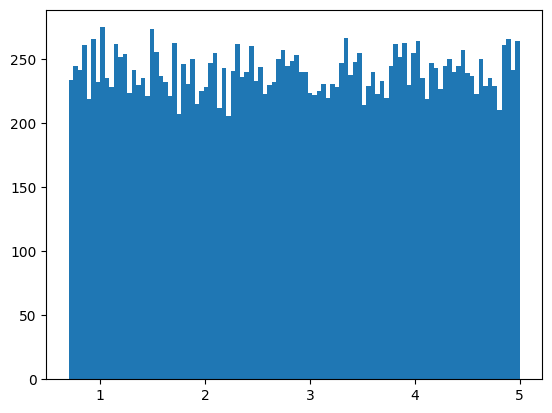

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting all the input/output variables on a histogram to infer results
for i in range(modified_dataset.shape[1]):
  plt.hist(modified_dataset.iloc[:, i], bins = 100)
  plt.show()
#observed that only the first two columns have a normalized data distribution, rest have random distribution

In [25]:
#normalizing the whole data to plot a correlation matrix heatmap
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
modified_normalized_dataset = scaler.fit_transform(modified_dataset)
modified_normalized_dataset = pd.DataFrame(modified_normalized_dataset)

         0         1         2         3         4         5         6   \
0  0.683307  0.273988  0.384863  0.080897  0.364899  0.915765  0.719350   
1  0.603218  0.315901  0.543773  0.934817  0.186578  0.684823  0.668774   
2  0.791337  0.223928  0.863534  0.353650  0.565796  0.145840  0.944169   
3  0.398937  0.453013  0.486248  0.022811  0.123658  0.297171  0.393930   
4  0.649260  0.254824  0.471972  0.611606  0.644707  0.222944  0.756823   

         7         8         9   ...        31        32        33        34  \
0  0.502281  0.851417  0.672669  ...  0.355364  0.962194  0.499218  0.631007   
1  0.148299  0.390761  0.884607  ...  0.445434  0.711166  0.572506  0.999142   
2  0.507486  0.689169  0.891062  ...  0.743996  0.074142  0.855697  0.600097   
3  0.939154  0.154561  0.625965  ...  0.684106  0.200927  0.343829  0.477899   
4  0.771364  0.211332  0.902443  ...  0.955088  0.221865  0.636618  0.036475   

         35        36        37        38        39        40  
0  0

In [26]:
#plotting the correlation matrix heatmap
fig = plt.gcf()
fig.set_size_inches(100,100)
sns.heatmap(modified_normalized_dataset.corr(), annot=True, annot_kws={"size": 30})
plt.show()
#we observe that the first two columns have a weak but greater correlation with other columns than any other column

From the above two results, we obverved that the first two columns of the dataset have different characteristics than the rest of the dataset. This provides us with the intuition to classify the first two columns as the output variables, and the rest of the dataset as input variables

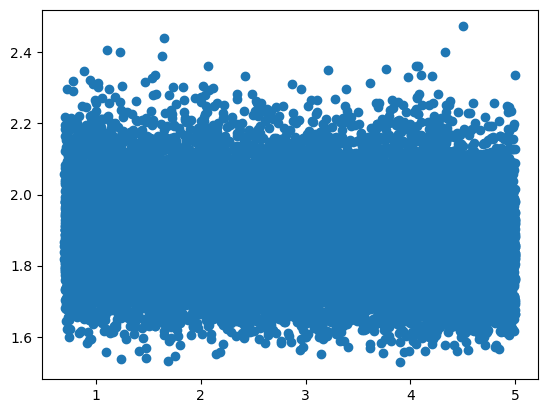

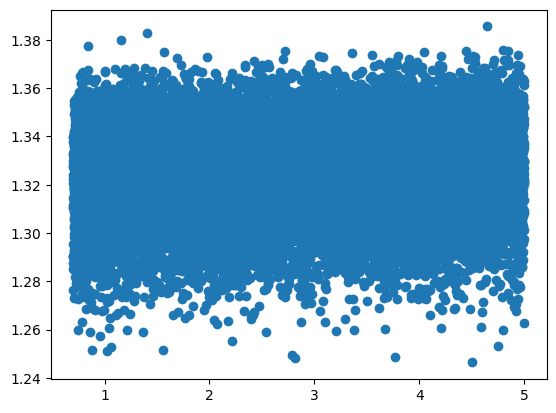

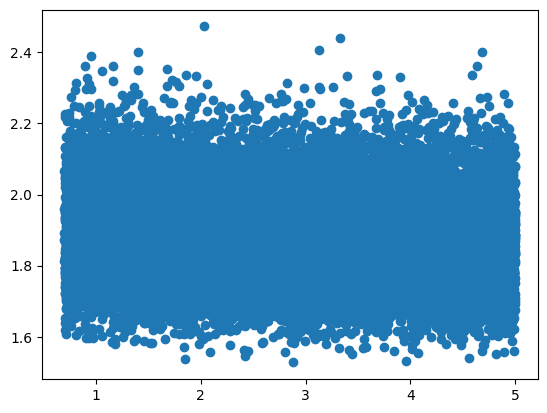

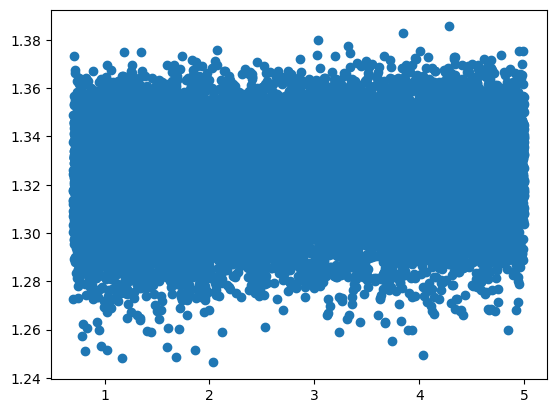

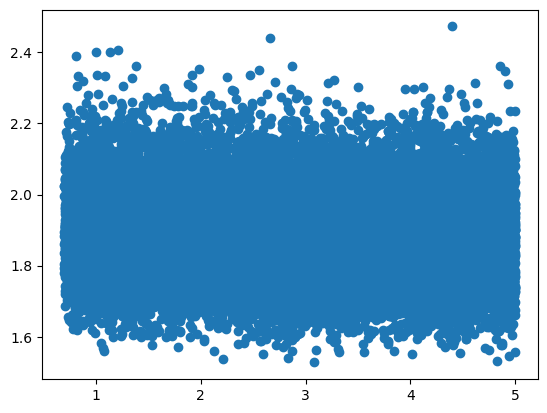

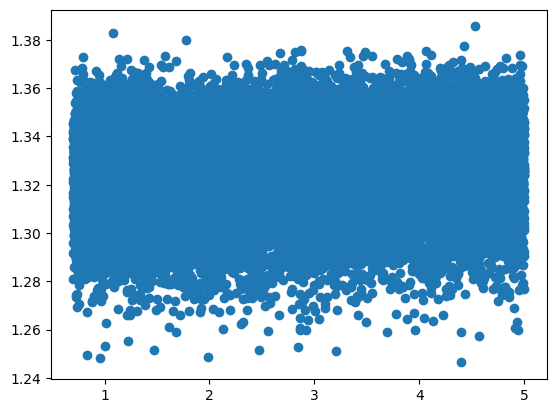

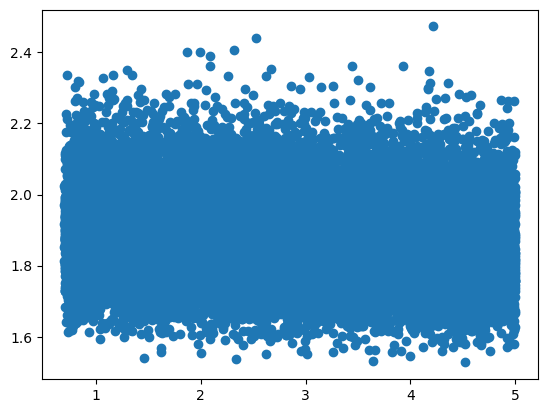

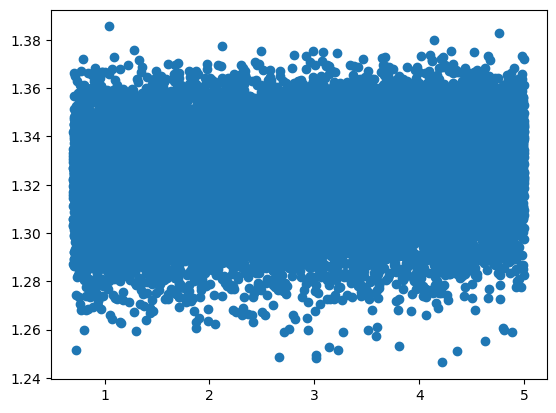

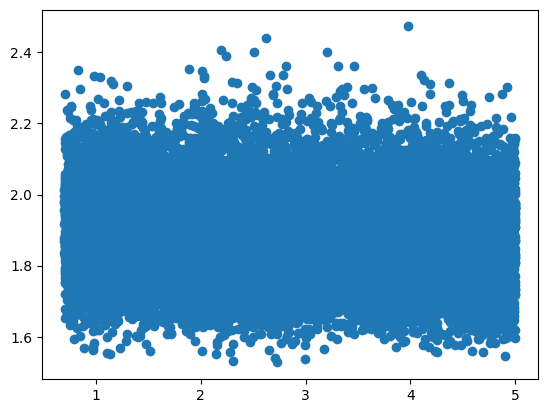

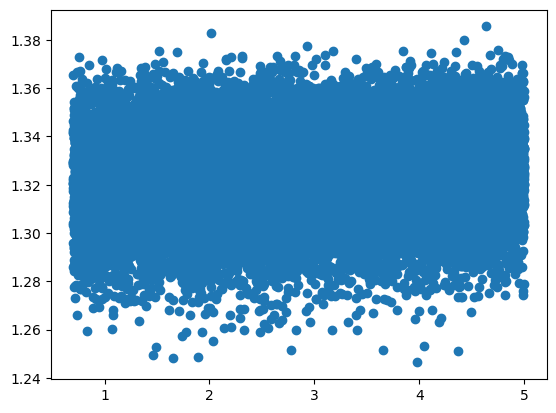

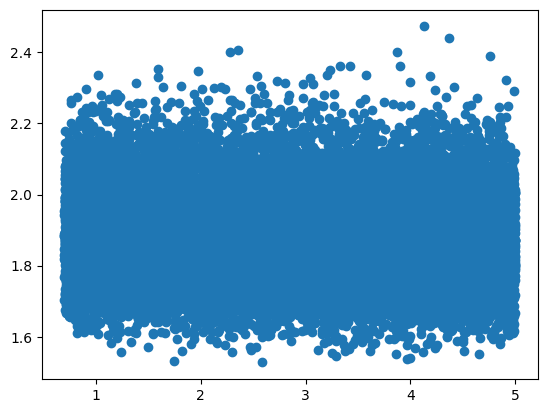

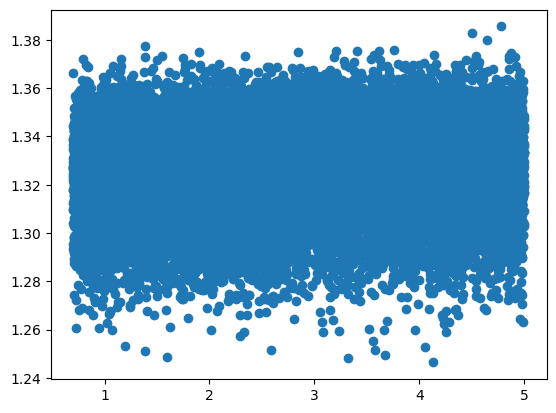

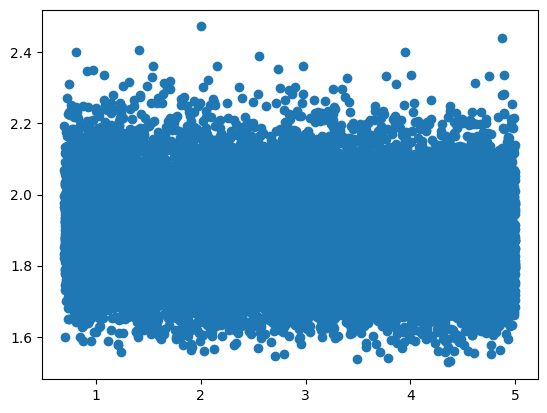

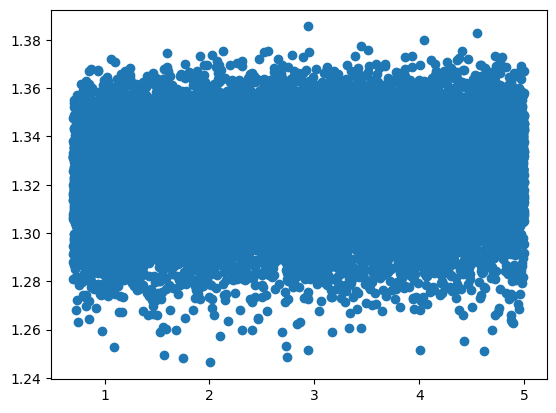

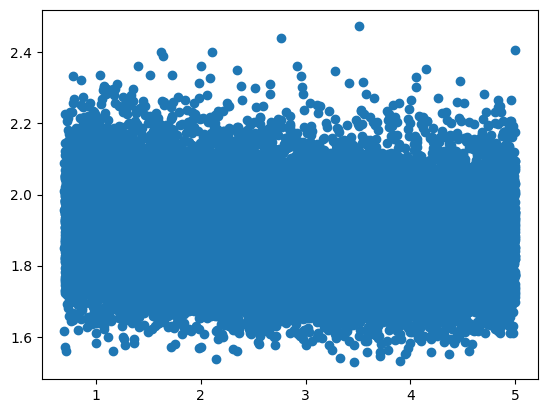

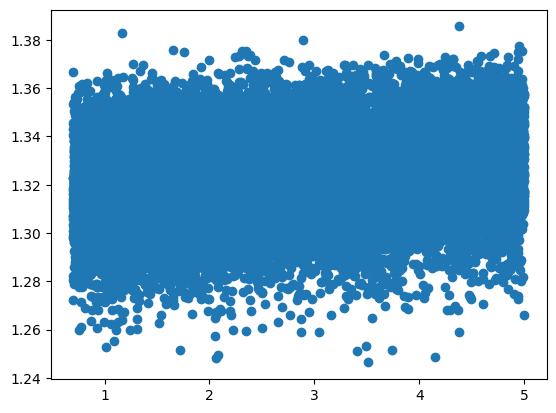

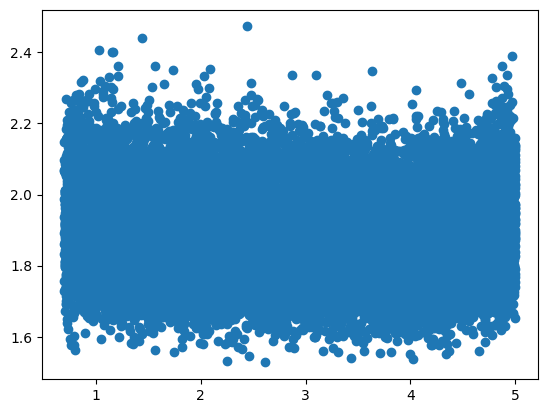

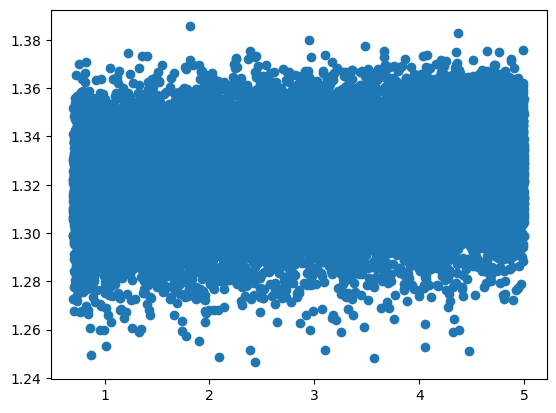

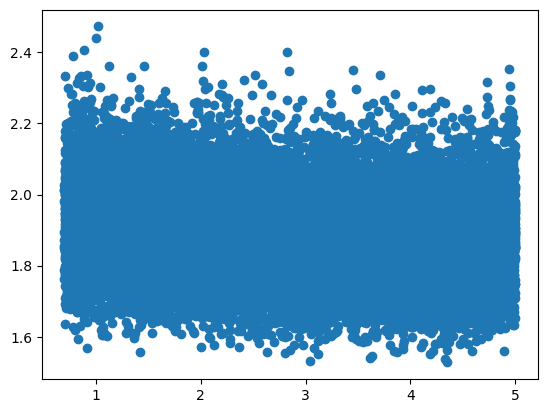

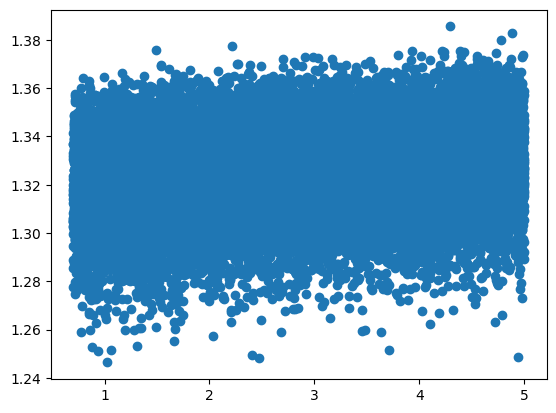

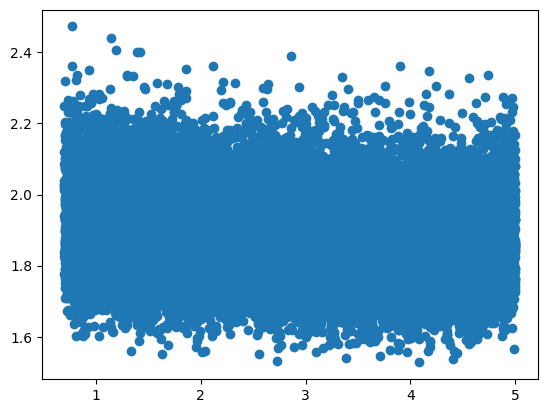

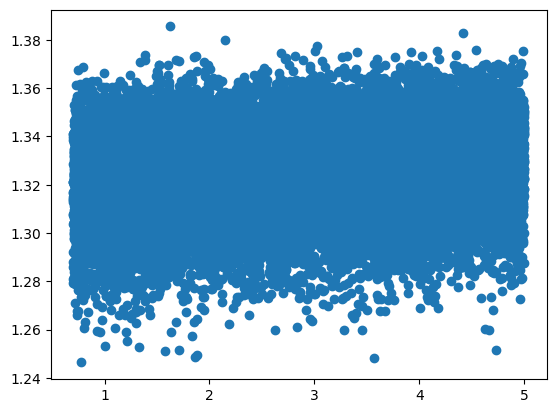

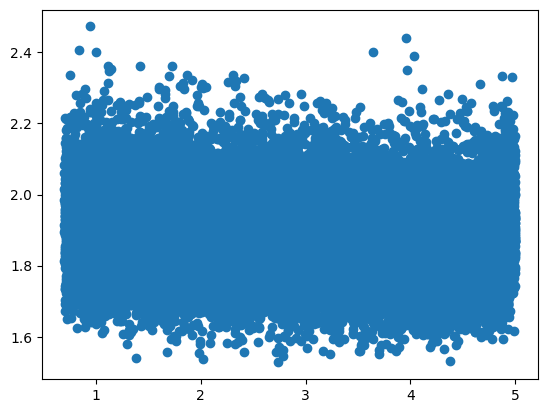

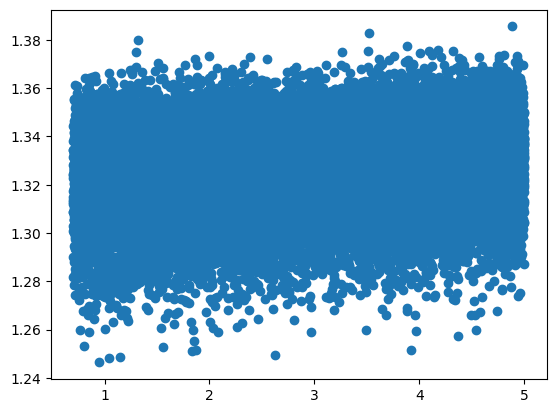

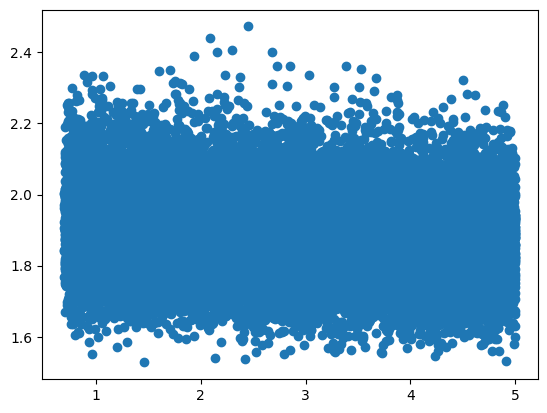

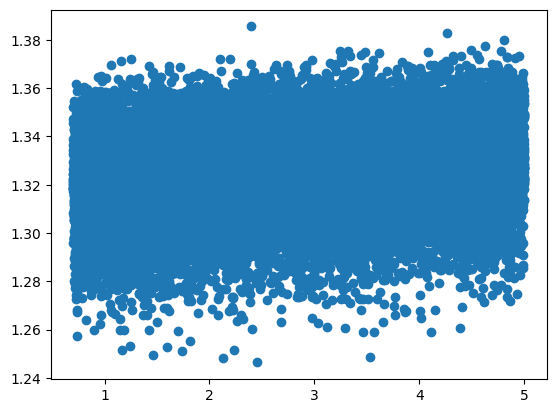

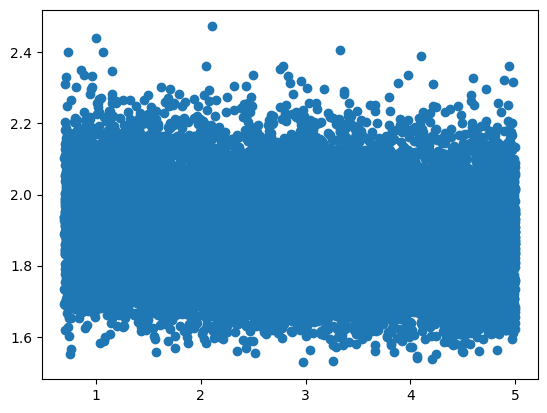

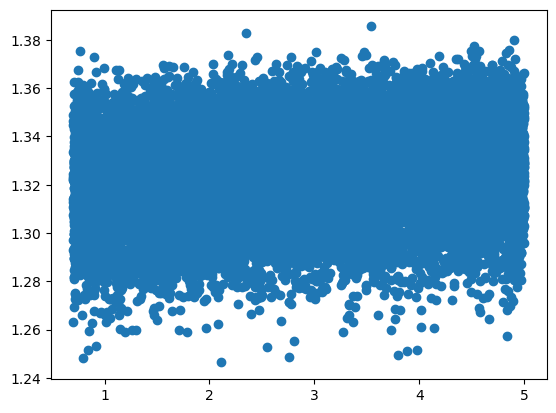

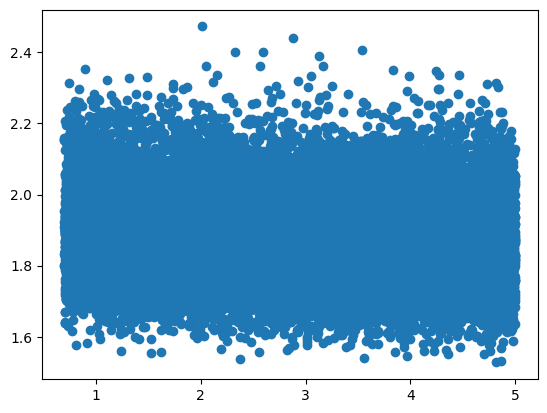

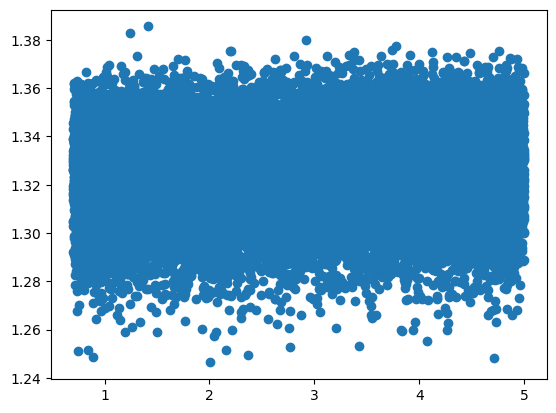

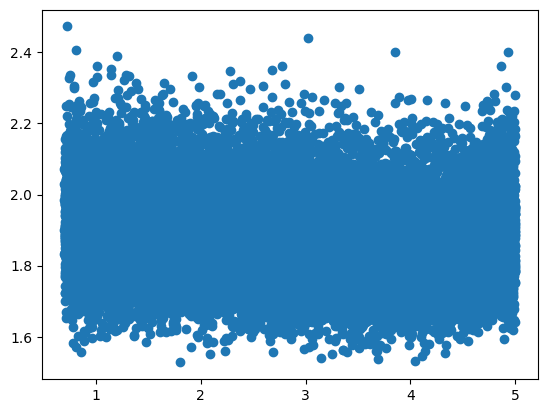

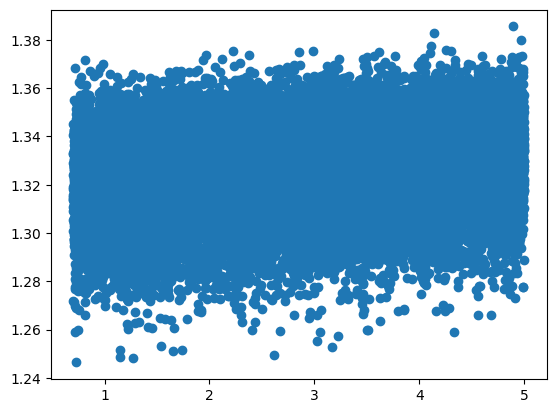

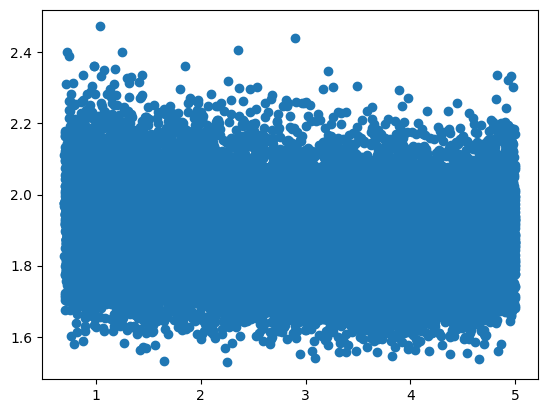

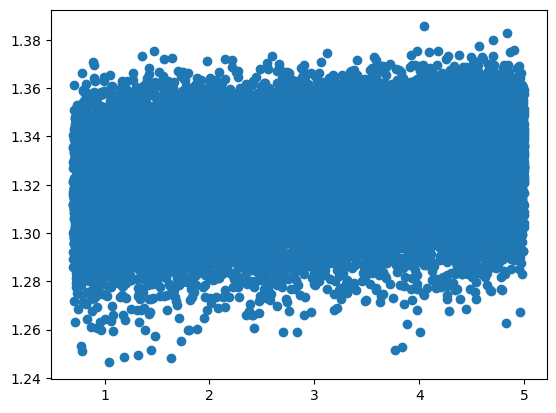

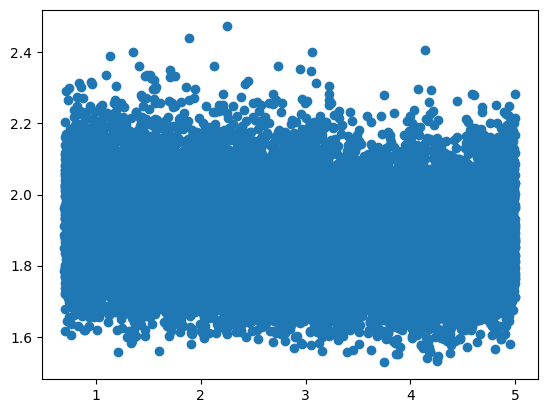

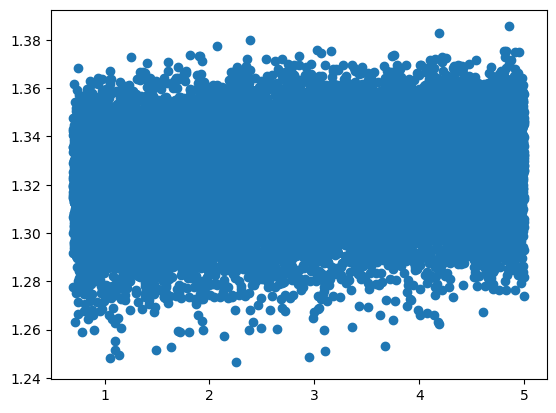

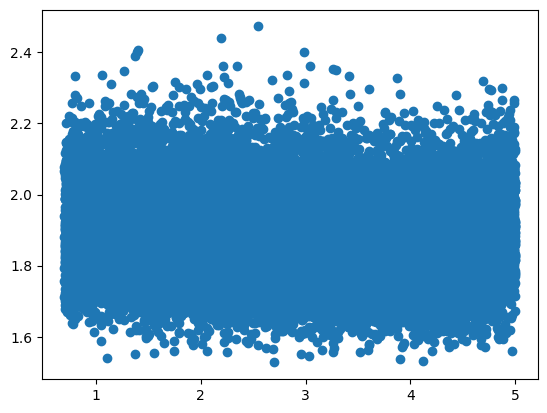

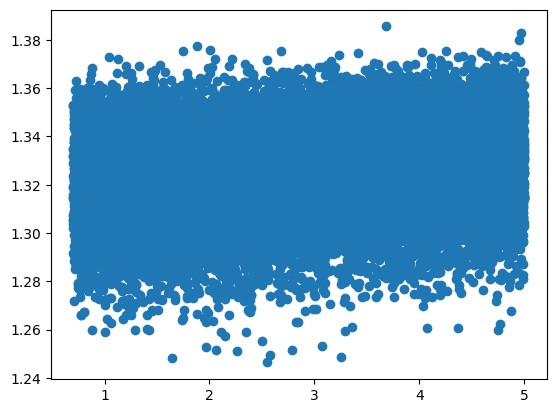

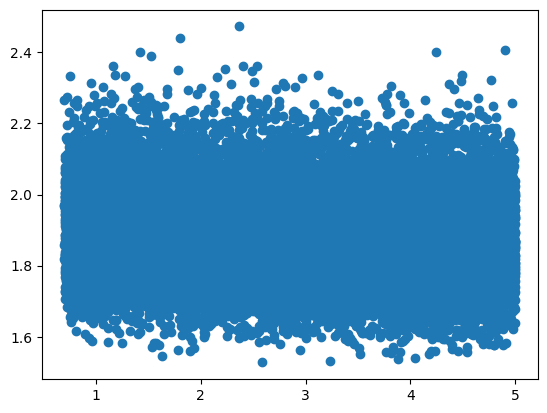

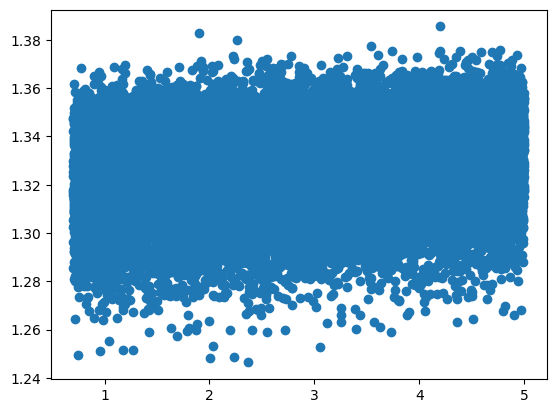

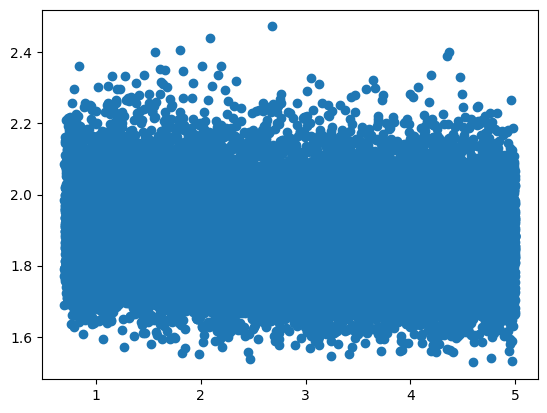

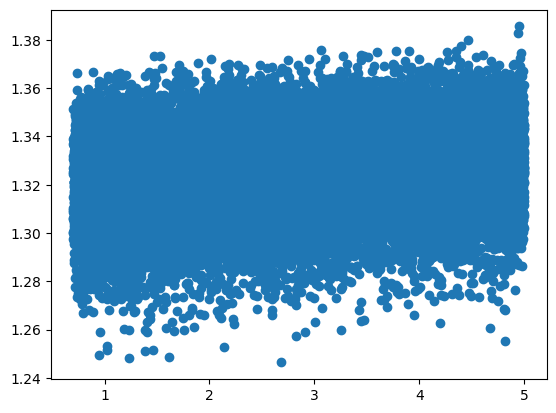

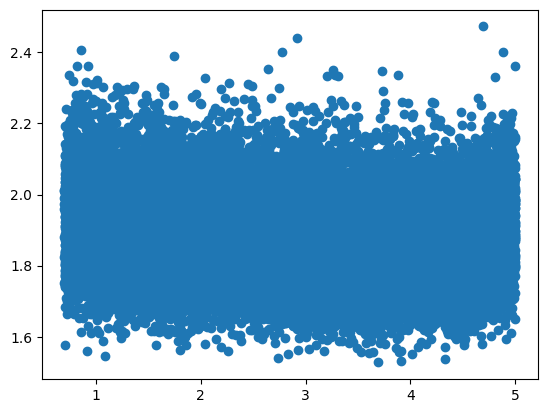

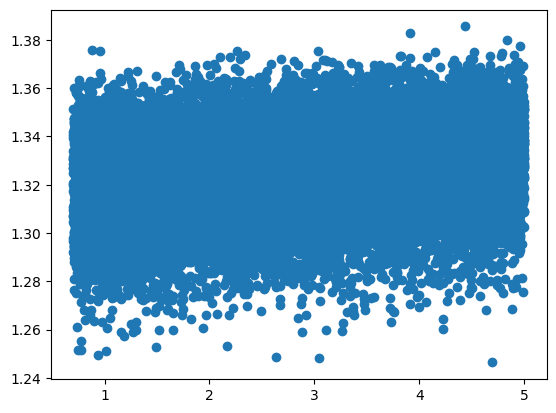

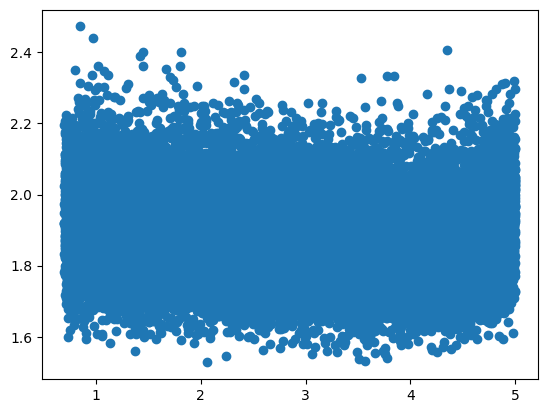

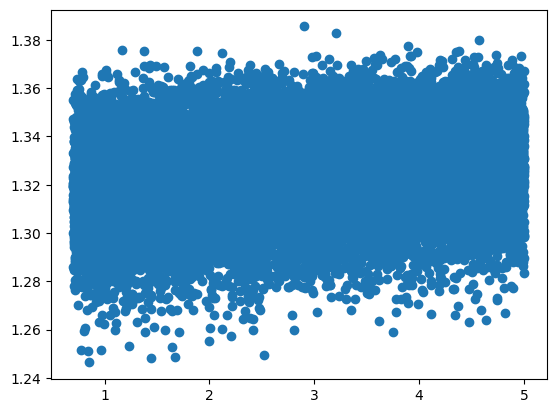

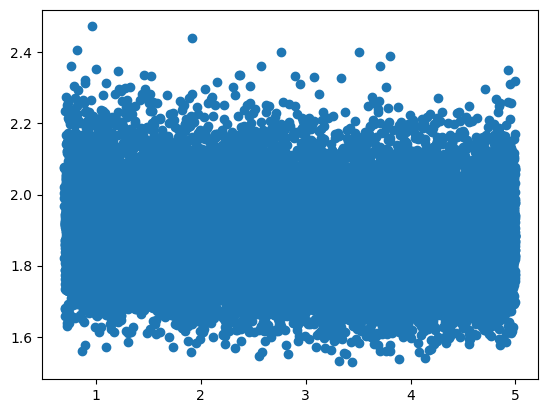

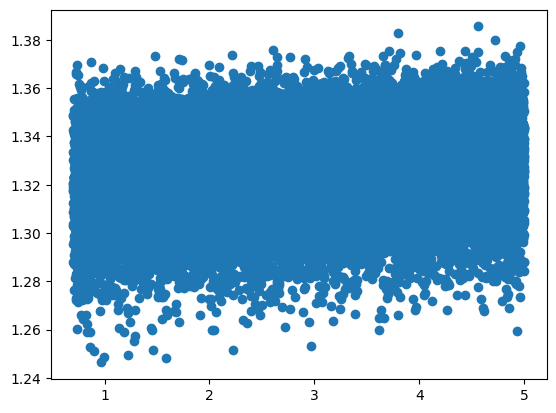

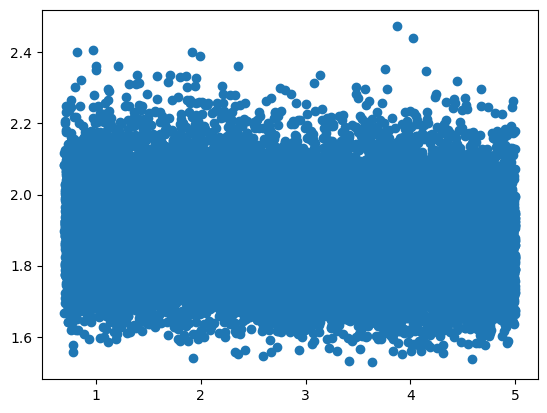

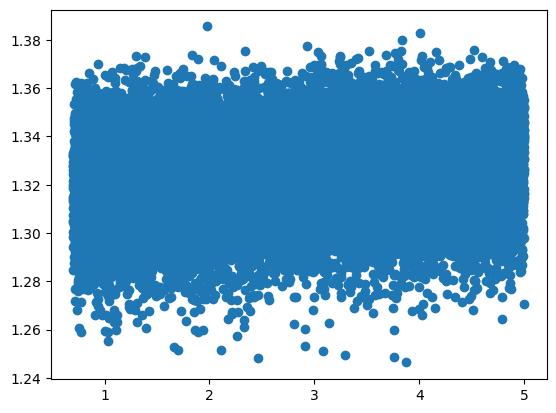

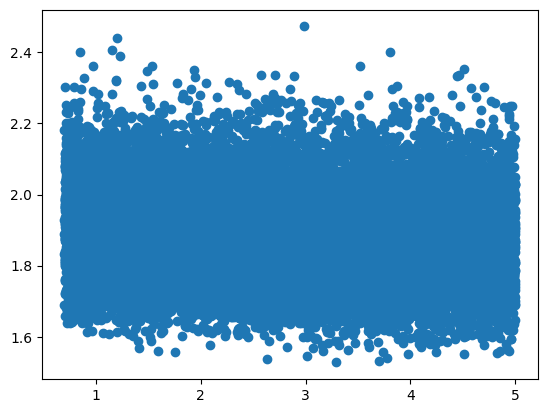

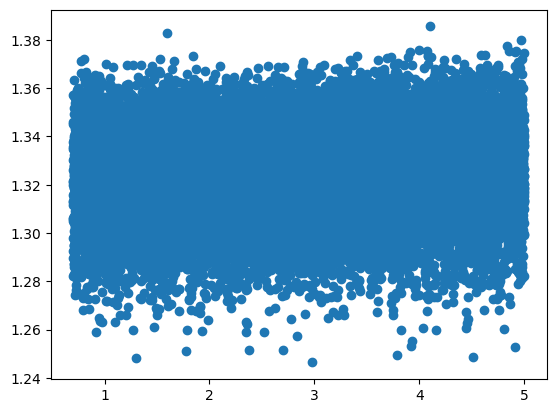

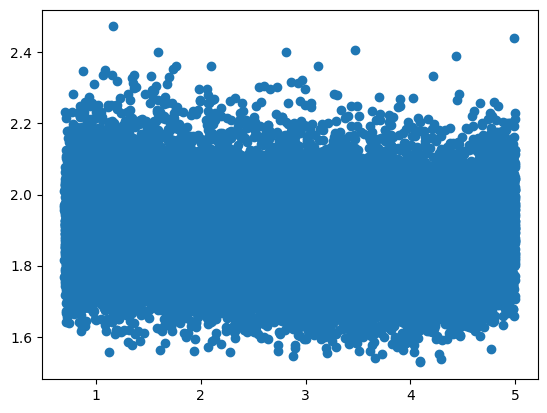

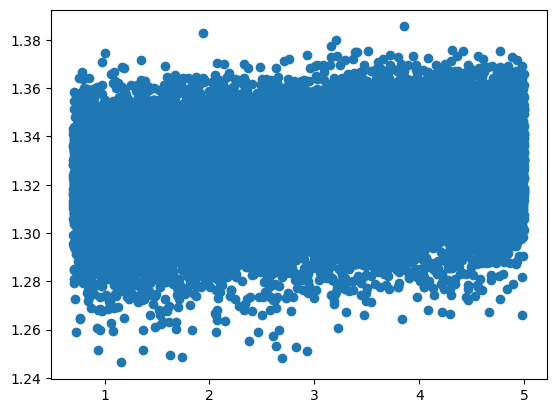

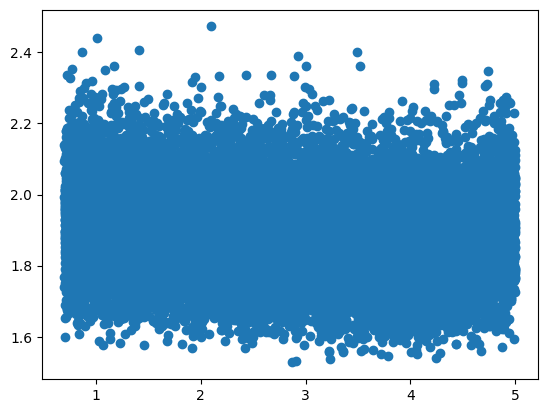

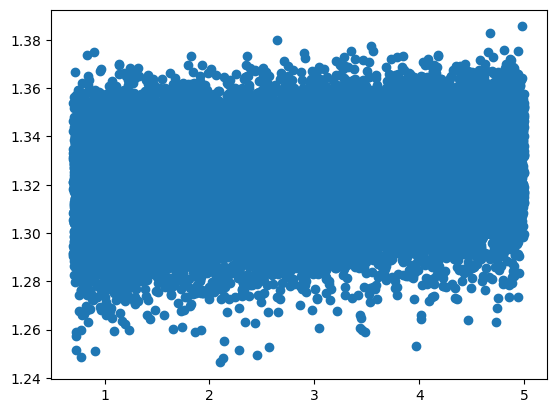

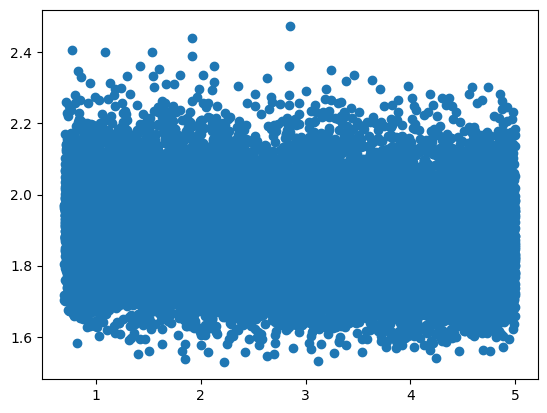

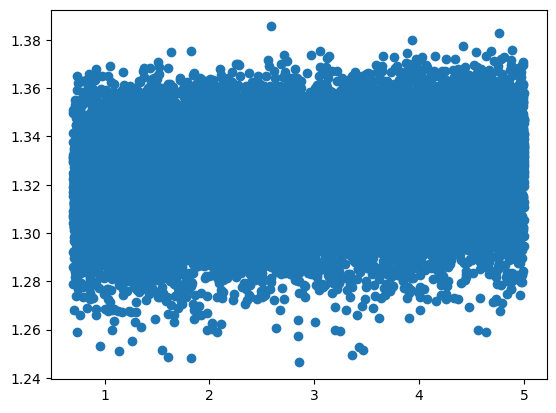

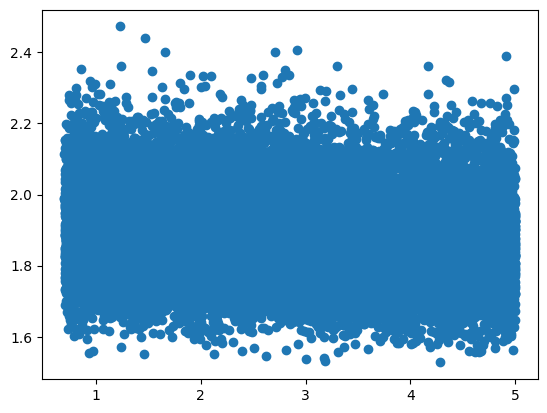

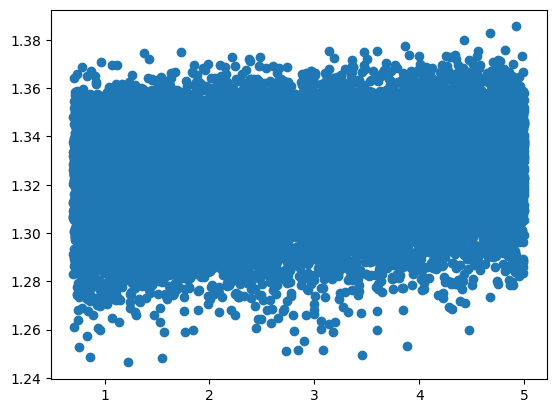

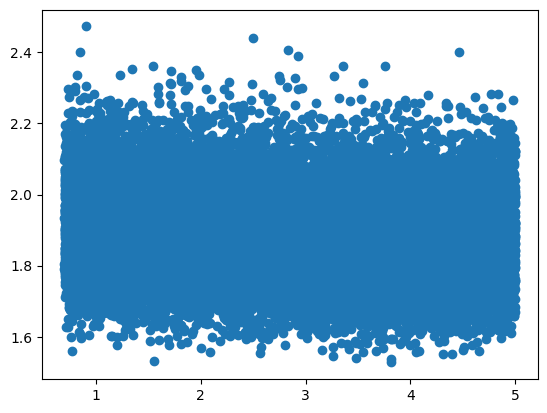

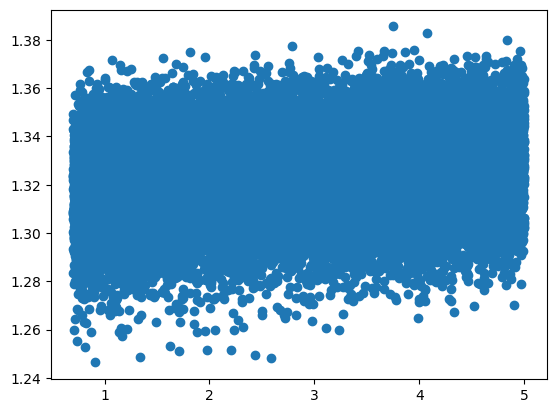

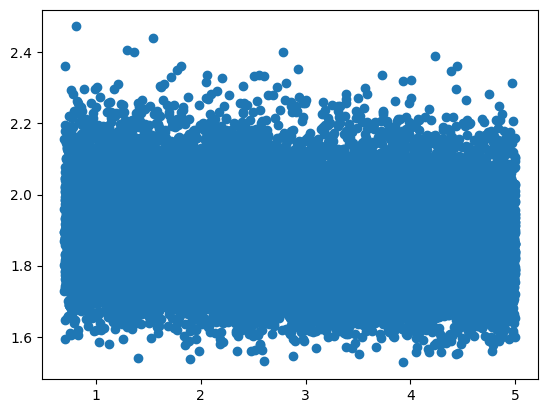

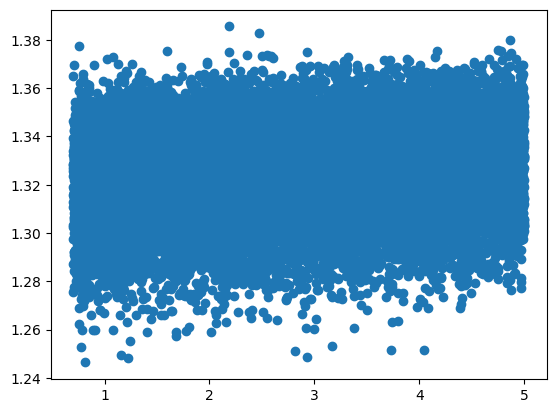

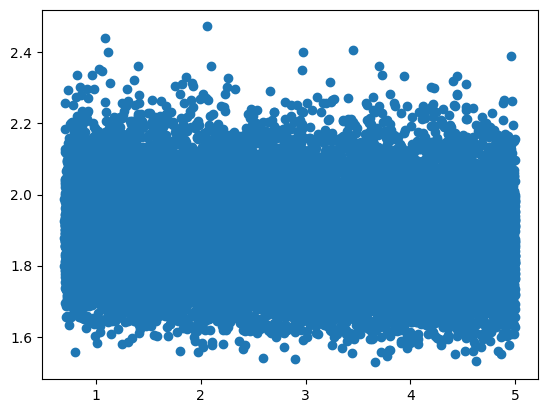

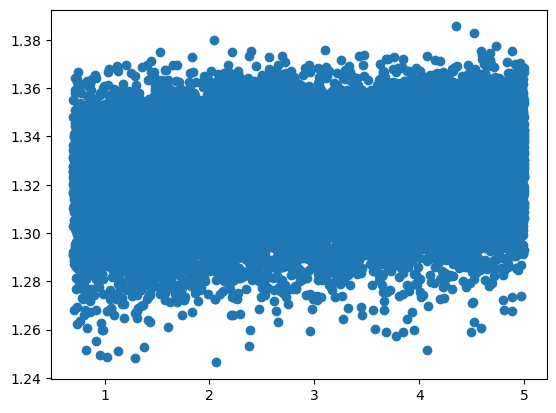

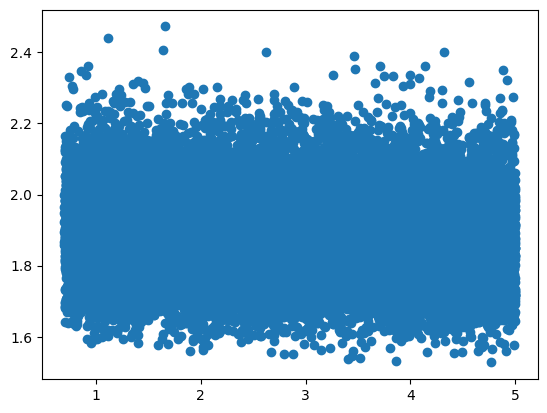

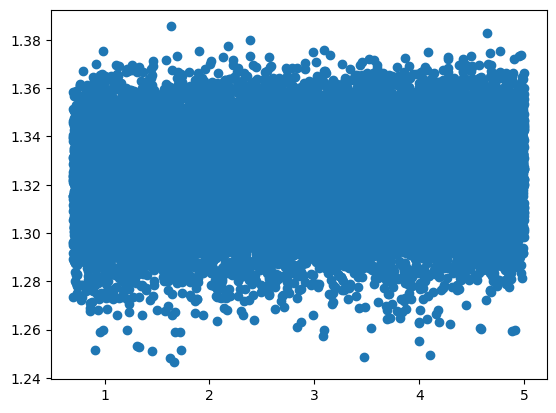

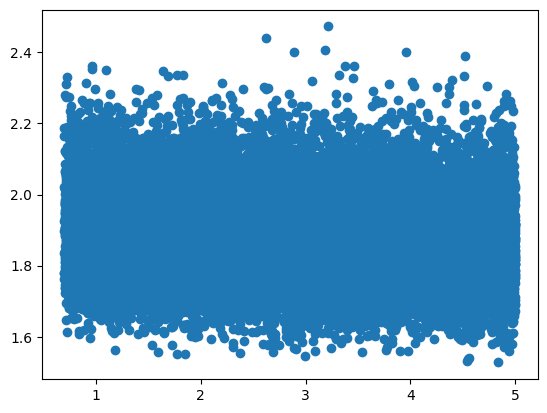

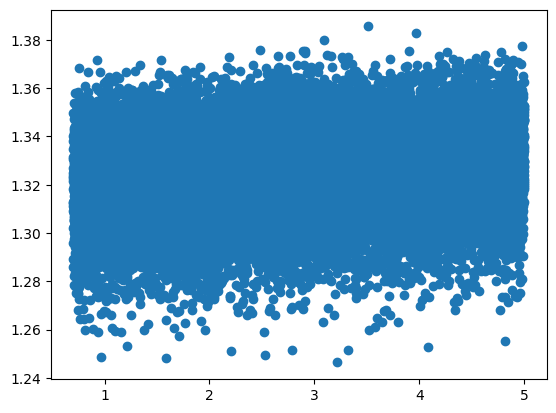

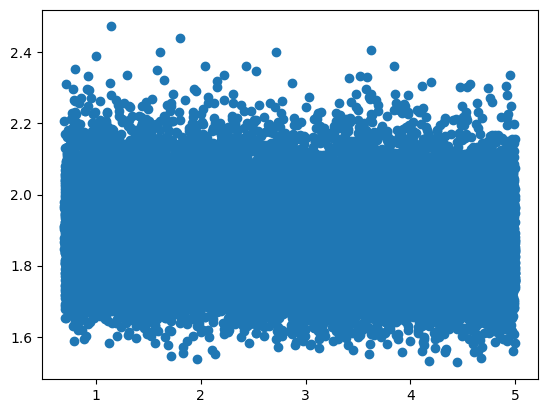

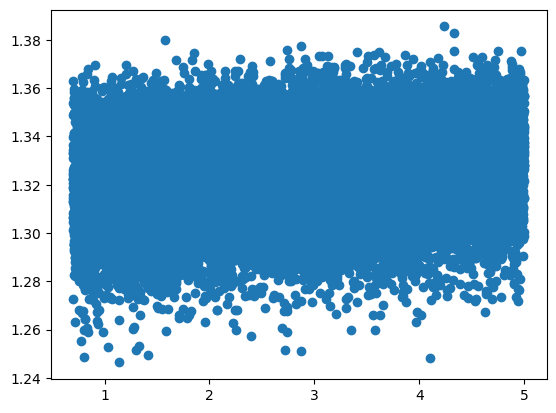

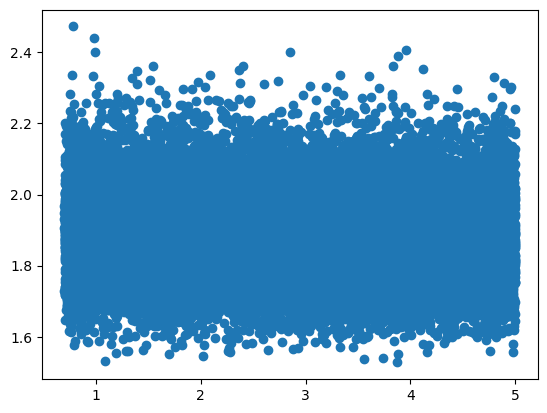

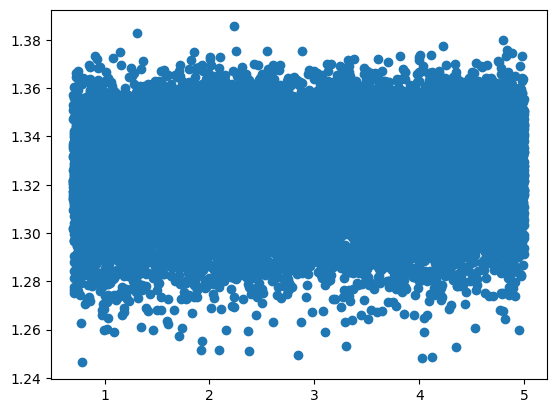

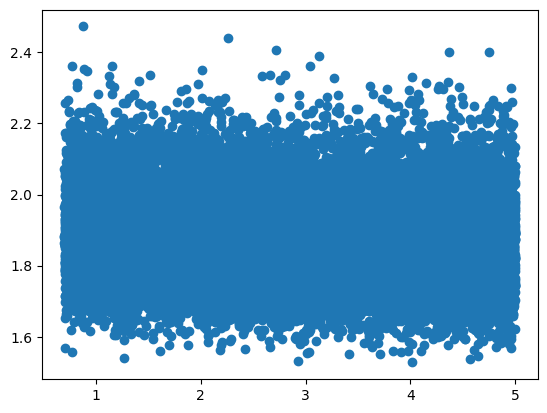

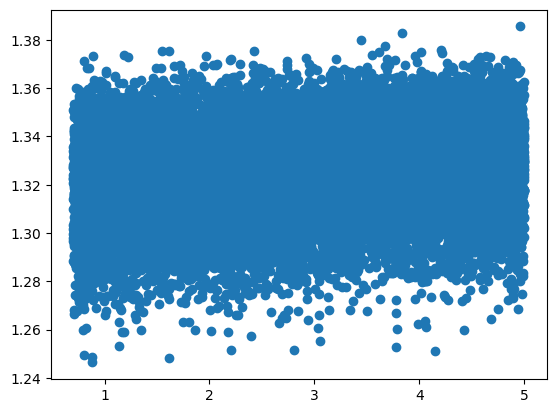

In [17]:
#looking for any linear relation between the output and input columns by plotting scatter plots
for i in range(2,40):
  plt.scatter(modified_dataset.iloc[:, i], modified_dataset.iloc[:,1])
  plt.show()
  plt.scatter(modified_dataset.iloc[:, i], modified_dataset.iloc[:,0])
  plt.show()
#no strong linear relation found, thus linear regression won't be optimum
#also, no standard curves(like a polynomial) were observed in the scatter plots

Thus since the relation between inputs and outputs is not simple, we can use random forest model or even better: neural networks, which will be optimum for these complex relations

In [28]:
#modifying the test data for use
test_data = pd.read_csv("testdata.csv")

#forming a proper dataframe because the values are giving as strings in a rows
modified_testdata_array = np.zeros(test_data.shape)
modified_testdata = pd.DataFrame(modified_testdata_array)

all_numbers = []
for i in range(test_data.shape[0]):
  numbers_in_row = test_data.iloc[i][0].split()
  all_numbers.extend([float(num) for num in numbers_in_row])

modified_testdata_array = np.array(all_numbers).reshape(test_data.shape[0],41)
modified_testdata = pd.DataFrame(modified_testdata_array)

#normalizing the data
scaler2 = MinMaxScaler()
modified_normalized_testdata = scaler2.fit_transform(modified_testdata)
modified_normalized_testdata = pd.DataFrame(modified_normalized_testdata)

#dividing it into intput and output test variables
X_test = modified_normalized_testdata.iloc[:, 2:].values
y_test = modified_normalized_testdata.iloc[:, 0:2].values

<ipython-input-28-4903b3d1e600>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numbers_in_row = test_data.iloc[i][0].split()


In [37]:
#implementing the neural network using tensorflow

X_train = modified_normalized_dataset.iloc[:, 2:].values
y_train = modified_normalized_dataset.iloc[:, 0:2].values

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0966 - val_loss: 0.0090
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076 - val_loss: 0.0050
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 12/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,120 (55.16 KB)

 Trainable params: 4,706 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,414 (36.78 KB)

None


In [38]:
#giving the final mean squared error based on the test data
print(f"Test Loss (MSE): {loss}")
#model summary
print(model.summary())

Test Loss (MSE): 0.009317571297287941


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,120 (55.16 KB)

 Trainable params: 4,706 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,414 (36.78 KB)

None
